In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**<h1><center>Loan Defaulter Prediction</center></h1>**

**<h2>Problem statement<h2>**

- Customer first apply for loan after that company validates the customer eligibility for loan.
- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online  application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.
- To automate this process, they have given a problem to identify the customers segments, those
are eligible for loan amount so that they can specifically target these customers.

Here we will use Analytics Vidhya Load Prediction Hackathon data set.


**<h2>Contents</h2>**

1. Importing the Libraries

2. Loading Data

3. Checking Distribution

3. Treating Imbalanced dataset

4. Treating Null Values

5. Checking Outliers

6. Feature Encoding

**<h3>1. Importing libraries</h3>**

Here we will load required libraries, pandas and numpy will be used for data wrangling, and matplotlib and seaborn will be used for visualization.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sb
from matplotlib import pyplot as plt

**<h3>2. Loading Data</h3>**

Here we will load train and test data set , also we will get some basic information about the dataset.

In [ ]:
train_data = pd.read_csv("/train.csv")

train_data.shape

(614, 13)

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


train_data has 614 observation and 13 columns. In which Loan_ID is a serial value of loneae.And Loan_Status is a target column.

 Their are 3 types of data available in this dataset they are Binary, ordinal, and numerical.
- Binary features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status,Education)
- Ordinal features: Variables in categorical features having some order involved (Dependents , Property_Area)
- Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

**<h3>3. Checking Distribution**</h2>

- Numerical Features : For Numerical features we can use distplot or hist plot to check distribution. As we all know <u>Target Variable is Loan Status </u>
  ```
  seaborn.distplot(a=None,
                   bins=None,
                   hist=True,
                   kde=True,
                   label=None,
                   ax=None)
   
   a : Series, 1d-array, or list.
       Observed data. If this is a Series object with a name attribute, the
       name will be used to label the data axis.
  
  bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins. If unspecified, as reference rule is used
        that tries to find a useful default.

  ```


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

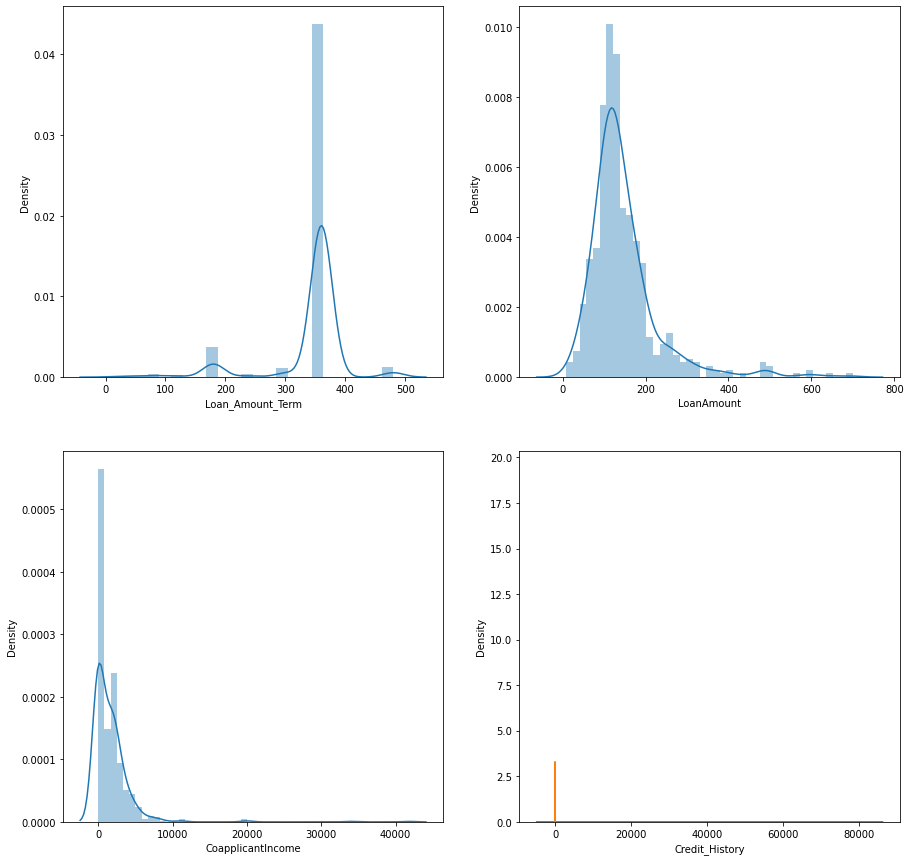

In [ ]:
def plot_distplot(numerical_features):
    """
    This function is used to plot distplot.
    Parameter
    ----------
      numerical_features : list()
        list of columns
    Returns
    --------
      None
    """
    fig, axes = plt.subplots(nrows = len(numerical_features)//2,
                             ncols = 2,
                             figsize = (15,15)
                             )
    for i , feature in enumerate(numerical_features):
        sb.distplot(train_data[feature],
                     ax = axes[(i//2)-1, int(i%2)-1])


numerical_features = train_data.select_dtypes(exclude = 'object').columns
plot_distplot(numerical_features)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


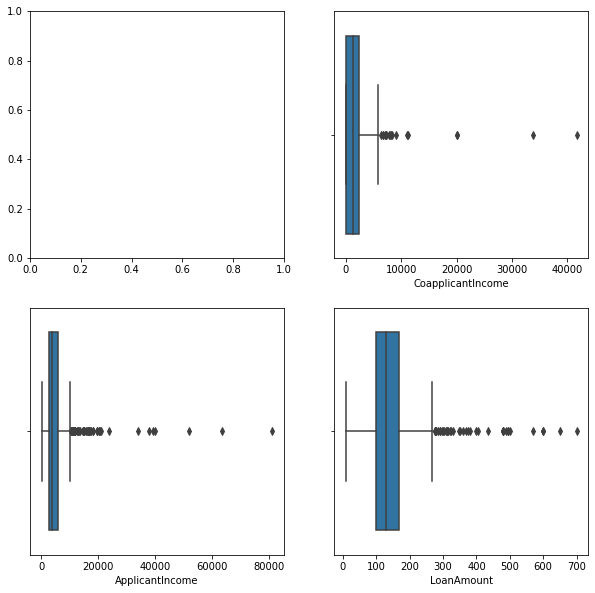

In [ ]:

def plot_boxplot(numerical_features):
    """
    This  function is used to plot boxplot.
    Parameter
    ---------
      numerical_features : list()
        List of numerical features
    Returns
    --------
      None
    """
    fig, axes = plt.subplots(nrows = len(numerical_features)//2 + 1,
                             ncols = 2,
                             figsize = (10,10)
                             )
    for i , feature in enumerate(numerical_features):
        sb.boxplot(train_data[feature],
                     ax = axes[(i//2)-1, int(i%2)-1])


numerical_features = ['LoanAmount','ApplicantIncome', 'CoapplicantIncome']
plot_boxplot(numerical_features)

In [ ]:
Q1 = train_data['LoanAmount'].quantile(0.25)
Q3 = train_data['LoanAmount'].quantile(0.75)

IQR = Q3-Q1

train_data = train_data.loc[train_data['LoanAmount'] < (Q3 + 3.5 * IQR)]

train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
Q1 = train_data['ApplicantIncome'].quantile(0.25)
Q3 = train_data['ApplicantIncome'].quantile(0.75)

IQR = Q3-Q1

train_data = train_data.loc[train_data['ApplicantIncome'] < (Q3 + 3.5 * IQR)]

train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
Q1 = train_data['CoapplicantIncome'].quantile(0.25)
Q3 = train_data['CoapplicantIncome'].quantile(0.75)

IQR = Q3-Q1

train_data = train_data.loc[train_data['CoapplicantIncome'] < (Q3 + 3.5 * IQR)]

train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


- Categorical Features : For Categorical features we can use countplot  check distribution.

  ```
  seaborn.countplot(x=None,
                    y=None,
                    data=None,
                    ax=None)
                    
  ```

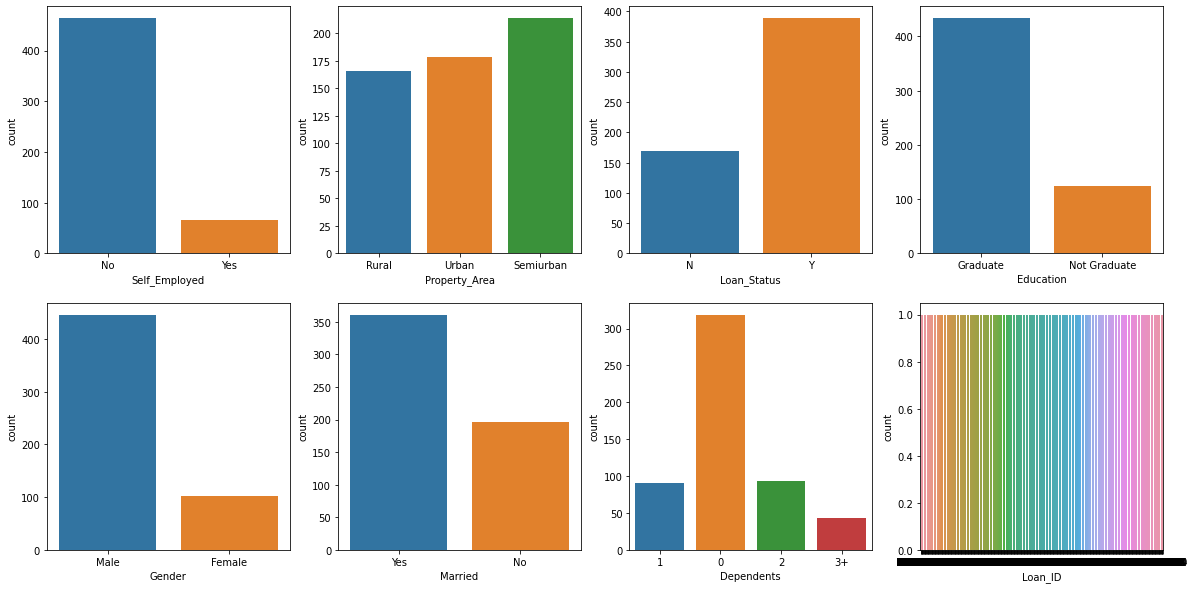

In [ ]:
def plot_countplot(categorical_features):
    """
    This function used to plot countplot
    Parameter
    -----------
      categorical_features : list()

    """
    fig, axes = plt.subplots(nrows = len(categorical_features)//4,
                             ncols = 4,
                             figsize = (20,10))
    for i , feature in enumerate(categorical_features):
        sb.countplot(x = feature,
                      data = train_data,
                      ax = axes[(i//4)-1, int(i%4)-1])

categorical_features = train_data.select_dtypes(include = 'object').columns
plot_countplot(categorical_features)


From above we can observe that
- The most of applicants are not self-employed.
- Most of the applicants are Males.
- Most of applications are married.
- Most of the applicants are graduated.
- Most of the applicants are approved. And that is slightly imbalanced dataset.

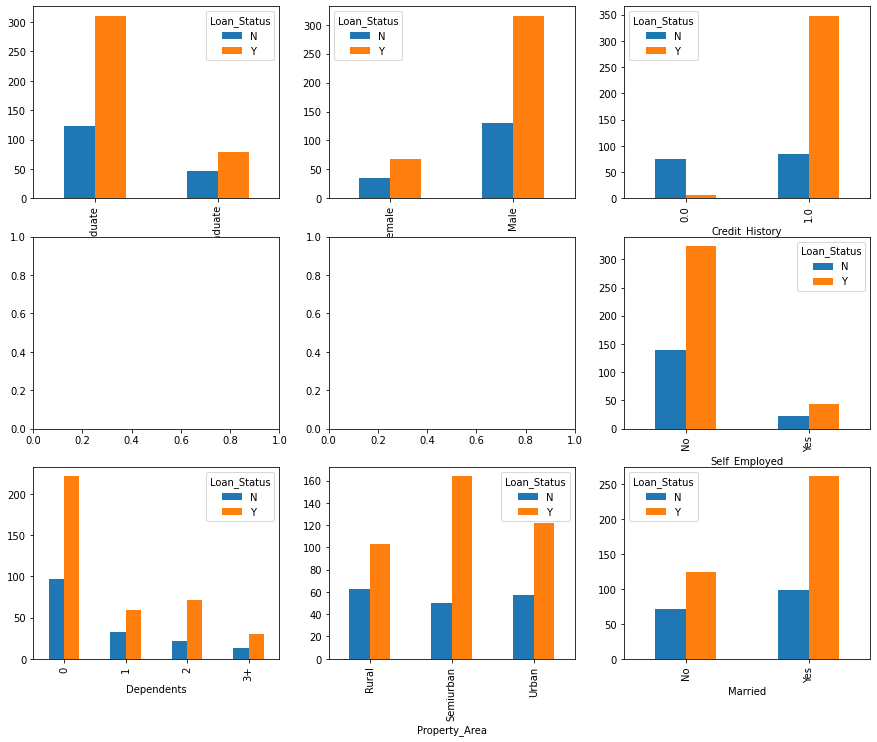

In [ ]:
def bar_plot(list_features):
    """
    This function is used to plot bar plot
    Parameter
    ---------
      list_features : list()
        list of columns
    Returns
    -------
      None
    """
    fig, axes = plt.subplots(nrows = len(list_features)//3+1,
                             ncols = 3,
                             figsize = (15, 12))

    for i, feature in enumerate(list_features):
        plot_df = pd.crosstab(train_data[feature],
                              train_data['Loan_Status'])
        plot_df.plot(kind='bar',
                    ax = axes[(i//3)-1, int(i%3)-1])

list_features = ['Married','Dependents','Property_Area',
                 'Credit_History','Education','Gender',
                 'Self_Employed']
bar_plot(list_features)

We inferred from the above diagram that

- Married applicant having more chances of getting loan than un-married
- Applicant with no dependents have more chances to get approve for loans
- Applicant having property in semi-urban area will have more chances of getting loan
- Having credit-history having more chances of getting loan
- In this dataset, more number Graduate applicants approved for loans
- Most of applicants are male which got approved for loans
- More number applicants are not self-employed

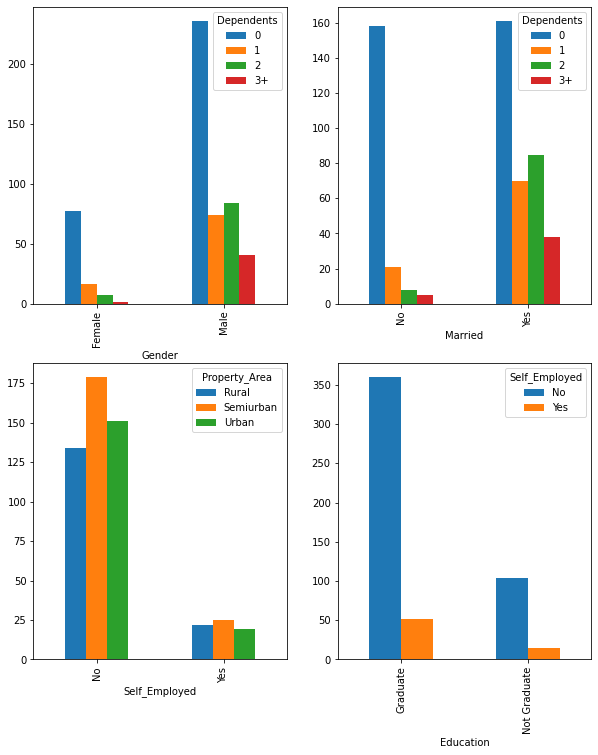

In [ ]:
fig, axes = plt.subplots(nrows = 2,
                         ncols = 2,
                         figsize = (10, 12))

plotting_data = pd.crosstab(train_data['Gender'], train_data['Dependents'])
plotting_data.plot.bar(ax = axes[0,0])

plotting_data = pd.crosstab(train_data['Married'], train_data['Dependents'])
plotting_data.plot.bar(ax = axes[0,1])

plotting_data = pd.crosstab(train_data['Self_Employed'], train_data['Property_Area'])
plotting_data.plot.bar(ax = axes[1,0])

plotting_data = pd.crosstab(train_data['Education'], train_data['Self_Employed'])
plotting_data.plot.bar(ax = axes[1,1])

We inferred from the above diagram that

- Gender, Married and Dependents are having stron Relationship.
- Most of Applicant with graduated is not self employed.
- Most of applicant having properties and not a self employed.

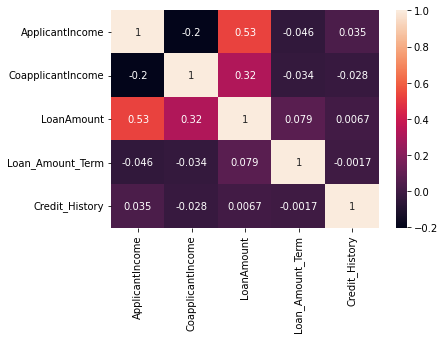

In [ ]:
sb.heatmap(train_data.corr(), annot=True)

From Above plots we inferres that Loan amount and Applicant Income have strongly Correlated

**4.Treating Imbalanced dataset**

We will use sklearn resample function to treat imbalanced dataset. Here we try to increase observations of minority classes.

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
train_majority = train_data[train_data.Loan_Status=='Y']
train_minority = train_data[train_data.Loan_Status=='N']

# Upsample minority class
train_minority_upsampled = resample(train_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=422,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_data = pd.concat([train_majority, train_minority_upsampled])

In [ ]:
train_data['Loan_Status'].value_counts()

N    422
Y    389
Name: Loan_Status, dtype: int64

**<h4>5. Treating missing values</h4>**

In this section we will impute null values. Usually we use mean and median for numerical features and mode for categorical features.

In [ ]:
train_data.isnull().sum().sort_values(ascending=False)

Credit_History       65
Self_Employed        35
Dependents           26
Loan_Amount_Term     26
Gender               17
Married               2
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

<h4>column : Credit_History</h4>

In [ ]:
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],
                                    inplace = True)

<h4>column : Self_Employed</h4>

In [ ]:
# Replace null values with mode
train_data.Self_Employed = train_data.Self_Employed.fillna(train_data['Self_Employed'].mode()[0])

<h4>column : LoanAmount</h4>

In [ ]:
train_data.LoanAmount = train_data.LoanAmount.fillna(train_data.LoanAmount.mean())

<h4>column : Dependents</h4>

In [ ]:
train_data.Dependents = train_data.Dependents.fillna(train_data['Dependents'].mode()[0])

In [ ]:
train_data['Dependents'].mode()[0]

'0'

<h4>column : Gender</h4>

In [ ]:
train_data.Gender = train_data.Gender.fillna(train_data['Gender'].mode()[0])

In [ ]:
train_data['Gender'].mode()[0]

'Male'

<h4>column : Loan_Amount_Term</h4>

In [ ]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(),inplace = True)

In [ ]:
train_data['Loan_Amount_Term'].median()

360.0

<h4>column : Married</h4>

In [ ]:
train_data['Married'].fillna(train_data['Married'].mode()[0],
                                    inplace = True)

In [ ]:
train_data['Married'].mode()[0]

'Yes'

**6. Checking Outliers**
<p>Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty.</p>
- we will try to remove outliers present in loan amount term , we will look into loan amount term where this is important variable for prediction.

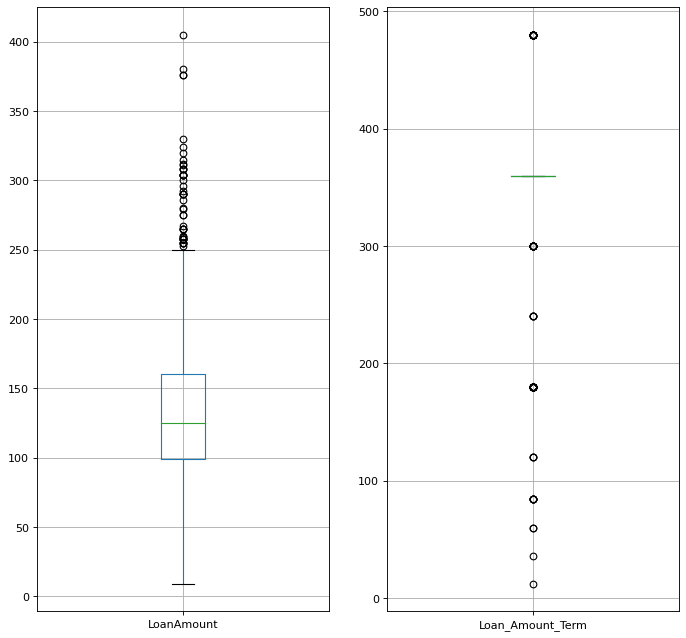

In [ ]:
plt.figure(figsize=(16, 10), dpi=80)

plt.subplot(131)
train_data.boxplot("LoanAmount")

plt.subplot(132)
train_data.boxplot("Loan_Amount_Term")

We have so many outliers but we unable to remove because we have less data for training.

**7. Feature Encoding**

Feature Encoding : Transforming the categorical data to numerical data. We will use map function to convert ordinal and binary data to numerical. And one-Hot encoding for nominal Data.

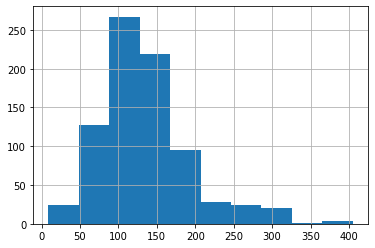

In [ ]:
train_data['LoanAmount'].hist()

<p> The above plots shows that it is not having normal distribution. Using logorithm we can make normal distribution.

In [ ]:
#log function to reduce the extreme effect in Loan amount
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['Total_income'] = train_data['ApplicantIncome'] + \
train_data['CoapplicantIncome']

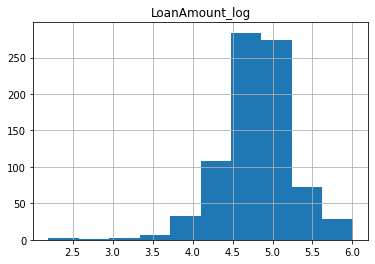

In [ ]:
train_data.hist("LoanAmount_log")

train_data['Total_income'] = train_data['ApplicantIncome'] + \
train_data['CoapplicantIncome']

In [ ]:
train_data.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'],
                axis = 1, inplace = True)

In [ ]:
train_data['Dependents'] = train_data['Dependents'].map({"0":0,
                                                         "1":1,
                                                         "2":2,
                                                         "3+":3})

train_data['Education'] = train_data['Education'].map({"Graduate":1,
                                                       "Not Graduate":0})

train_data['Gender'] = train_data['Gender'].map({"Male":1,"Female":0})

train_data['Loan_Status'] = train_data['Loan_Status'].map({"Y":1,"N":0})

train_data['Married'] = train_data['Married'].map({"Yes":1,"No":0})

train_data['Self_Employed'] = train_data['Self_Employed'].map({"Yes":1,"No":0})

train_data['Property_Area'] = train_data['Property_Area'].map({"Rural":0,
                                                               "Semiurban":1,
                                                               'Urban':2})

In [ ]:
train_data.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
LoanAmount_log      0
Total_income        0
dtype: int64

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income
2,LP001005,1,1,0,1,1,360.0,1.0,2,1,4.189655,3000.0
3,LP001006,1,1,0,0,0,360.0,1.0,2,1,4.787492,4941.0
4,LP001008,1,0,0,1,0,360.0,1.0,2,1,4.948760,6000.0
5,LP001011,1,1,2,1,1,360.0,1.0,2,1,5.587249,9613.0
6,LP001013,1,1,0,0,0,360.0,1.0,2,1,4.553877,3849.0


<h4>saving the preprocessed file for model training</h4>

In [ ]:
train_data.to_csv('/content/drive/My Drive/Loan Prediction/Data Files/\
processed_data_imbalanced_treated.csv', index=False)